In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


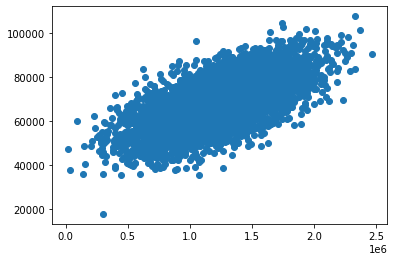

In [6]:
plt.scatter(df['Price'],df['Avg. Area Income'])

In [7]:
df['Address'].unique()

array(['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101',
       '188 Johnson Views Suite 079\nLake Kathleen, CA 48958',
       '9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', ...,
       '4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165',
       'USS Wallace\nFPO AE 73316',
       '37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595'],
      dtype=object)

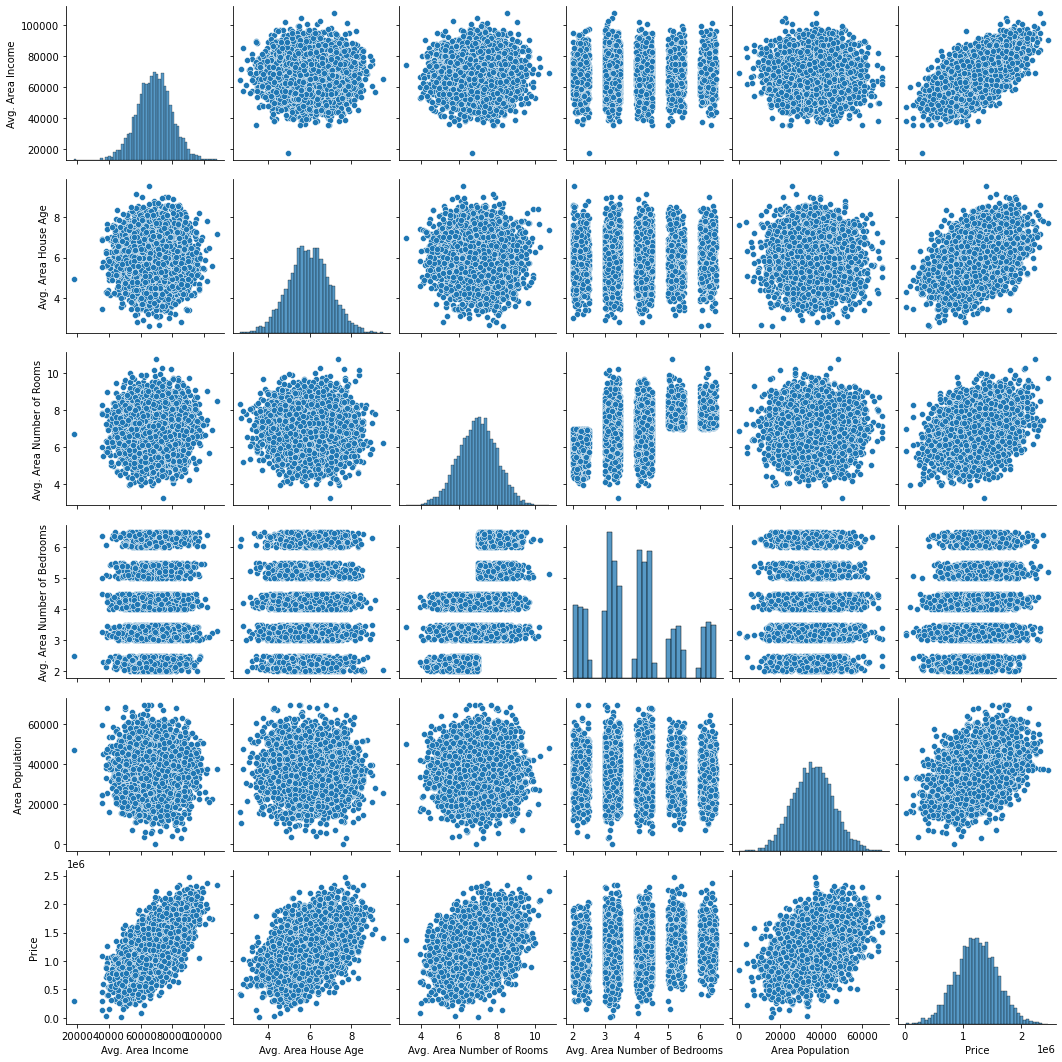

In [8]:
sns.pairplot(df)

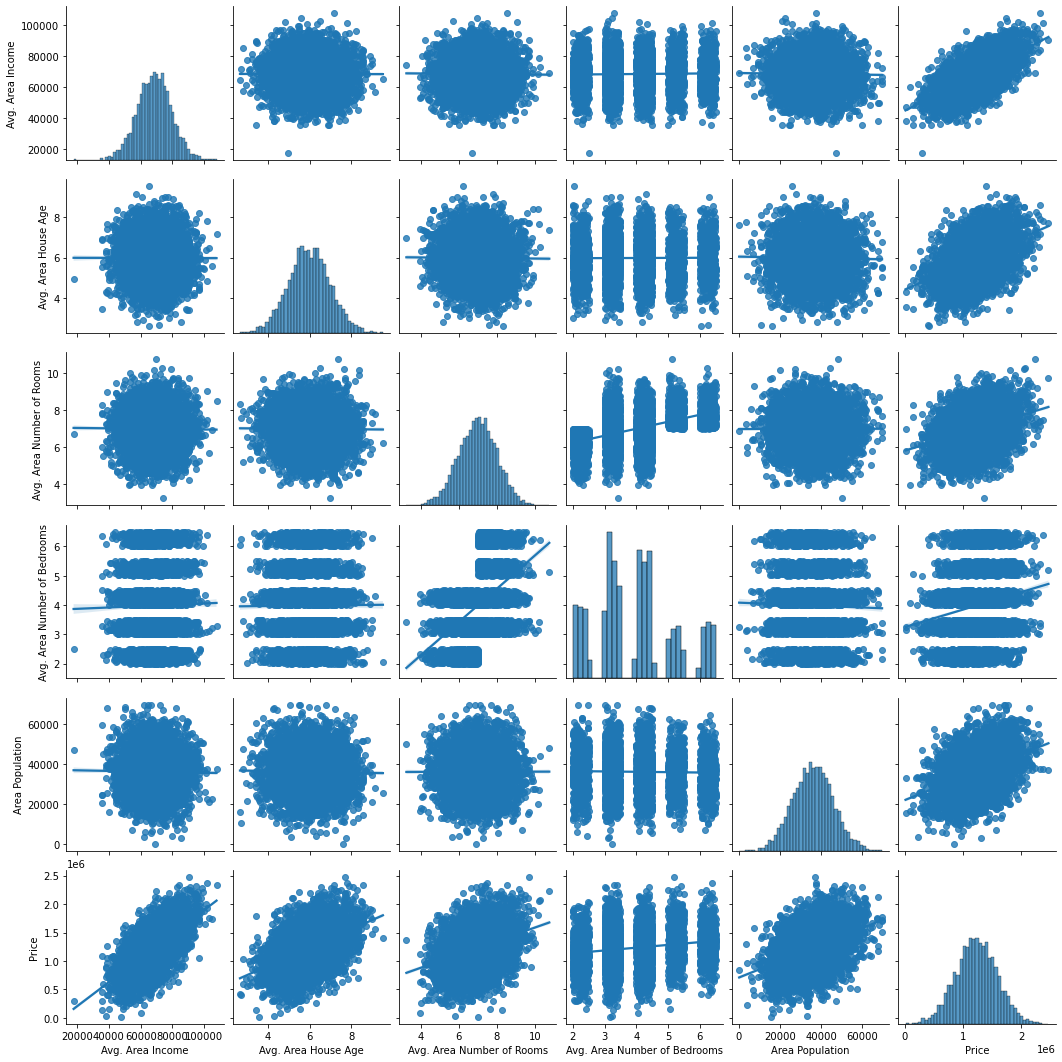

In [9]:
sns.pairplot(df,kind='reg')

<AxesSubplot:>

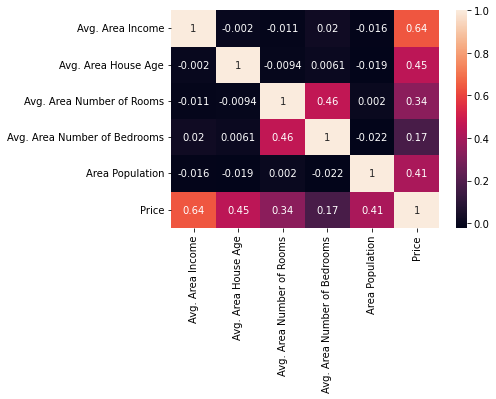

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
# Feature Matrix
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population']]

# Label Matrix
y = df['Price']

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=101)

In [15]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 3430 to 4959
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           3750 non-null   float64
 1   Avg. Area House Age        3750 non-null   float64
 2   Avg. Area Number of Rooms  3750 non-null   float64
 3   Area Population            3750 non-null   float64
dtypes: float64(4)
memory usage: 146.5 KB


In [16]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1718 to 3063
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           1250 non-null   float64
 1   Avg. Area House Age        1250 non-null   float64
 2   Avg. Area Number of Rooms  1250 non-null   float64
 3   Area Population            1250 non-null   float64
dtypes: float64(4)
memory usage: 48.8 KB


In [17]:
ytrain.shape

(3750,)

In [18]:
ytest.shape

(1250,)

# Polynimial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [27]:
pre_process = PolynomialFeatures(degree=2)

In [29]:
X_poly = pre_process.fit_transform(xtrain)

In [31]:
X_poly

array([[ 1.00000000e+00, -7.94152277e-01,  2.10495117e+00,
         6.30677838e-01, -1.67165177e+00,  4.43081944e+00],
       [ 1.00000000e+00, -9.15155186e+00, -4.81286449e+00,
         8.37509014e+01,  4.40451789e+01,  2.31636646e+01],
       [ 1.00000000e+00, -3.10367371e+00,  3.90202401e+00,
         9.63279051e+00, -1.21106093e+01,  1.52257913e+01],
       [ 1.00000000e+00, -1.42946517e+00,  5.16850105e+00,
         2.04337067e+00, -7.38819223e+00,  2.67134031e+01],
       [ 1.00000000e+00, -7.46938680e+00, -4.20198333e+00,
         5.57917391e+01,  3.13862388e+01,  1.76566639e+01],
       [ 1.00000000e+00, -9.19585147e+00, -3.90678125e+00,
         8.45636843e+01,  3.59261801e+01,  1.52629397e+01],
       [ 1.00000000e+00, -9.31764266e+00, -4.27315015e+00,
         8.68184648e+01,  3.98156861e+01,  1.82598122e+01],
       [ 1.00000000e+00, -9.20490564e+00, -4.57687928e+00,
         8.47302878e+01,  4.21297419e+01,  2.09478239e+01],
       [ 1.00000000e+00, -2.76017908e+00,  5.551

In [32]:
pr_model = LinearRegression()

In [36]:
pr_model.fit(X_poly, ytrain)

LinearRegression()

In [39]:
y_pred = pr_model.predict(X_poly)

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytrain, y_pred)

0.004806400751662431

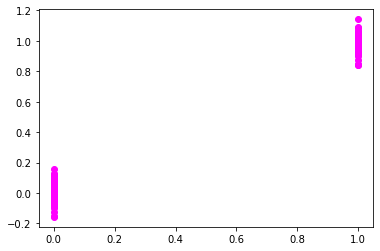

In [54]:
plt.scatter(ytrain,y_pred,color = 'magenta')